Code by Fabiano Tarulli

In [1]:
!ls

annealed_system_4800K.dump  annealing.in.settings  W-Mo.eam.fs
annealing.in		    plot-temperature.py    W-Mo_en_min.data
annealing.in.init	    RDF_API.ipynb
annealing.in.run	    run-parallel.py


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from ovito.io import import_file
from ovito.modifiers import CoordinationAnalysisModifier

In [3]:
# User parameters
dump_file = "annealed_system_4800K.dump"
total_frames = 1000
cutoff_distance =10.0
bins = 1000
ndump = 50
partial_rdf = True

In [4]:
# Dictionary for atom type names
# TODO: replace atom types in the legend of RDF plots!
atom_types = dict()
atom_types['1']='W'
atom_types['2']='Mo'

In [5]:
# Load file
pipeline = import_file(dump_file)

# RDF modifier
rdf_mod = CoordinationAnalysisModifier(
    cutoff=cutoff_distance, 
    number_of_bins=bins,
    partial=partial_rdf
)
pipeline.modifiers.append(rdf_mod)

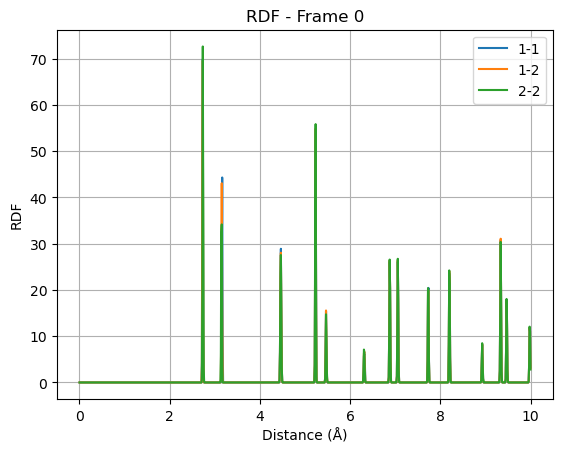

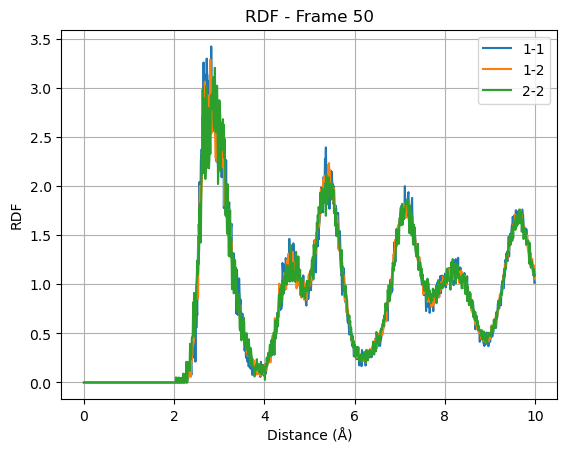

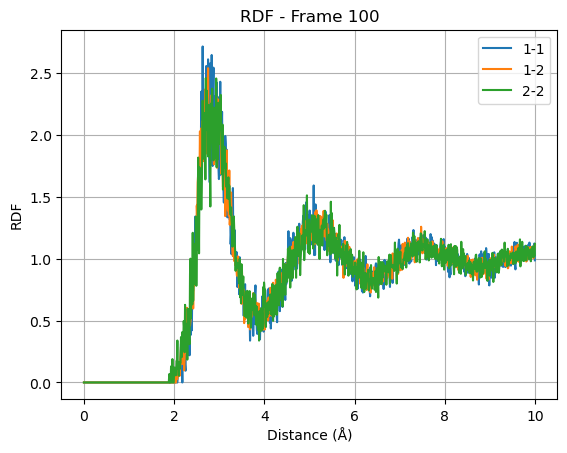

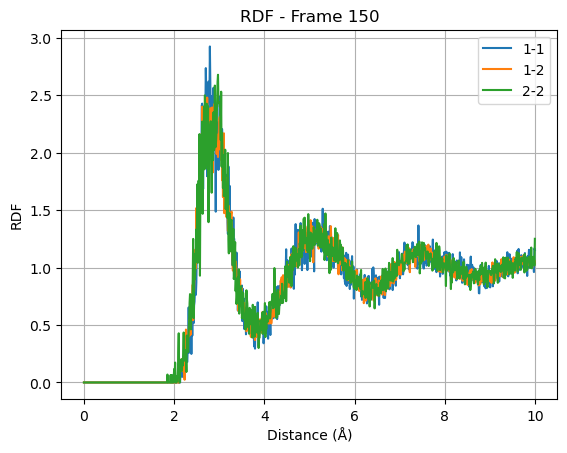

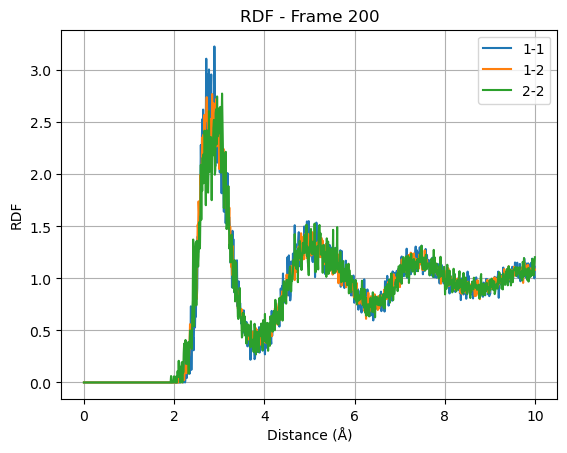

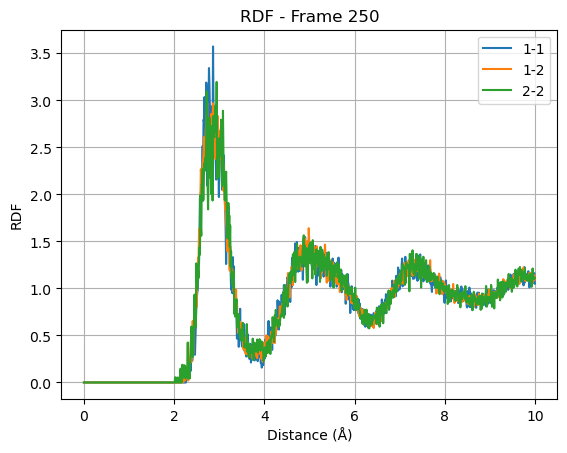

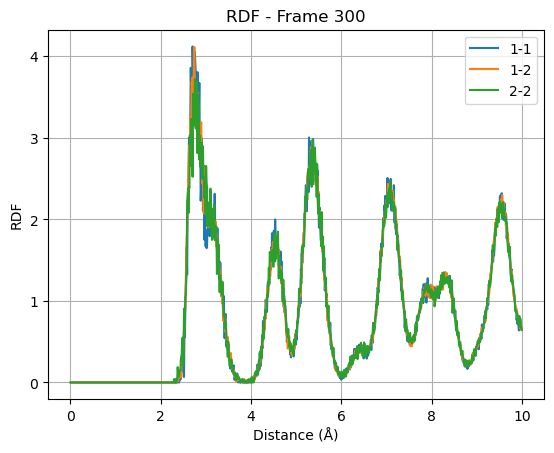

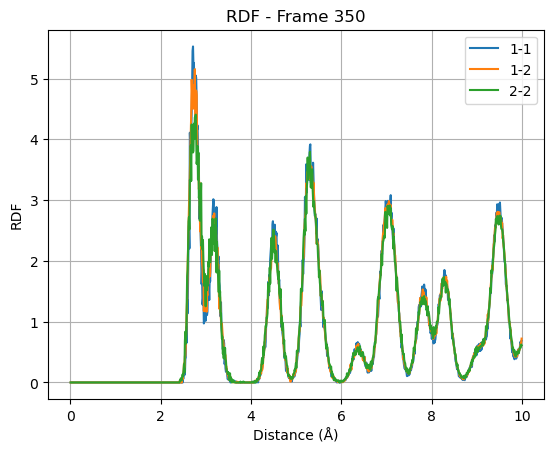

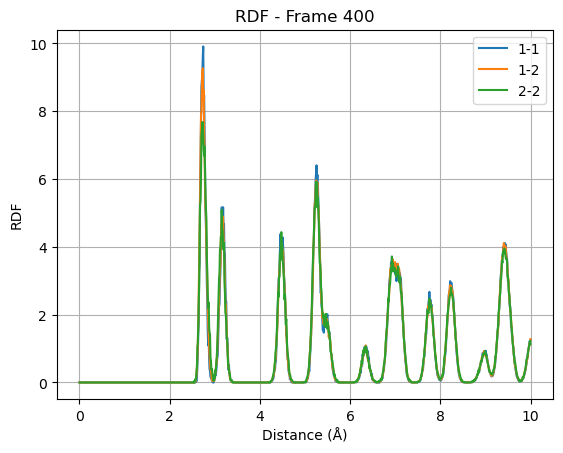

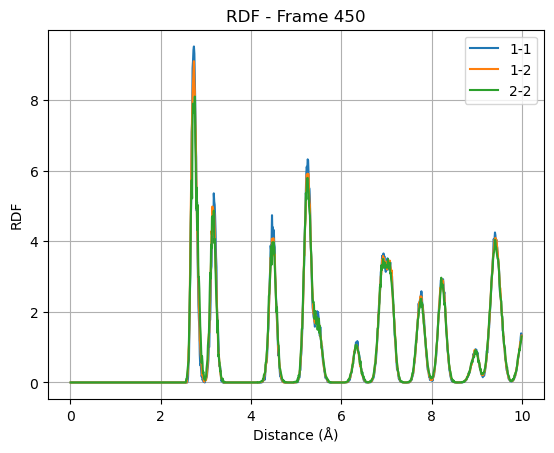

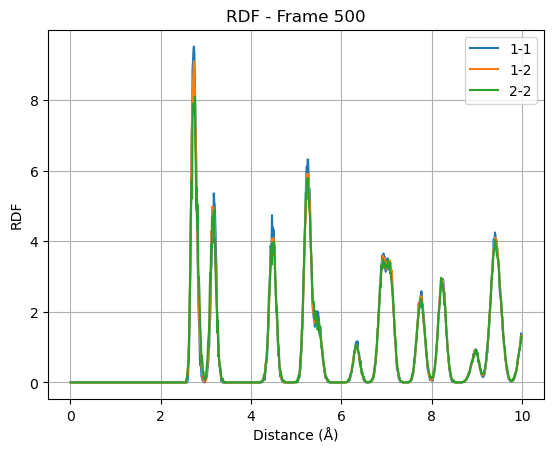

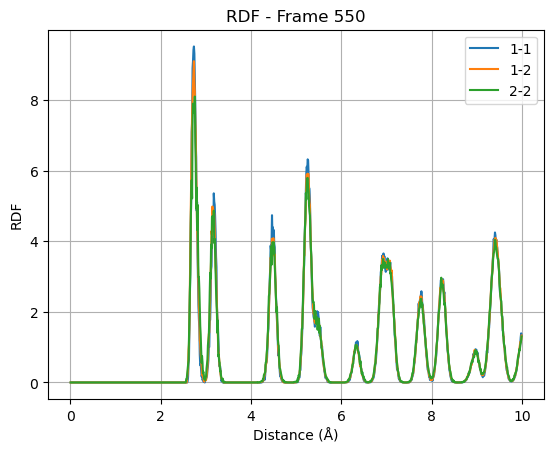

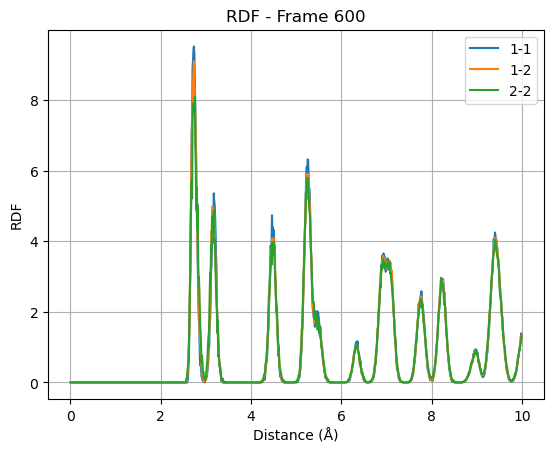

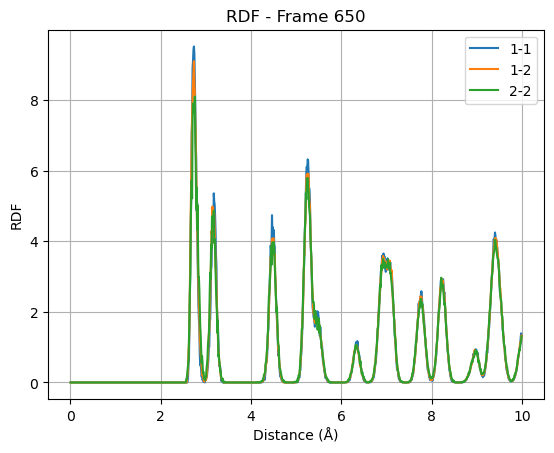

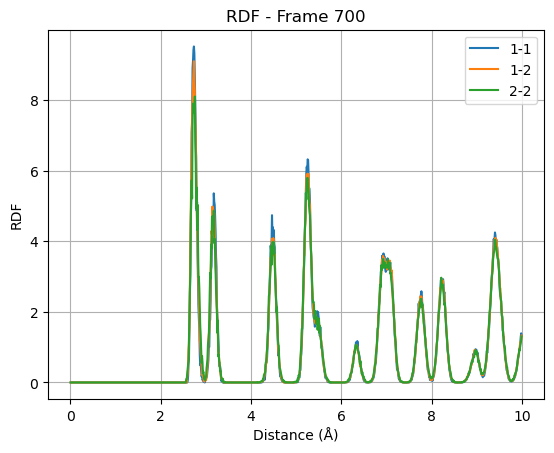

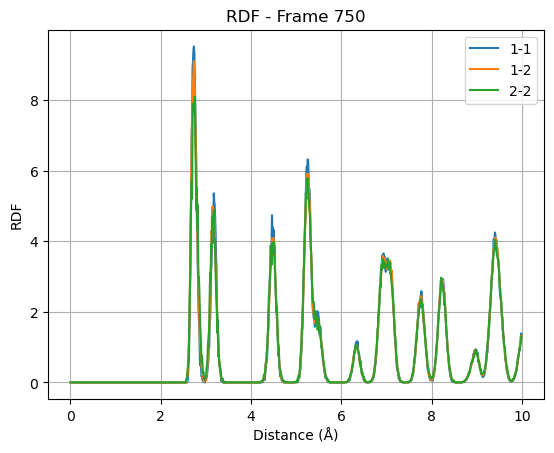

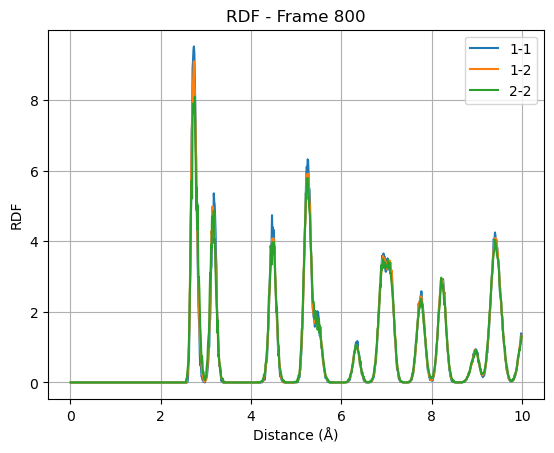

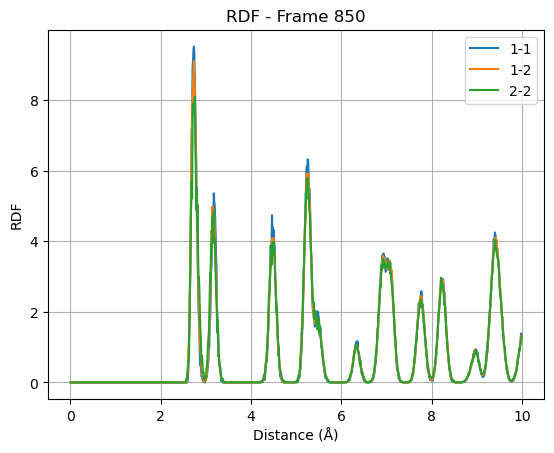

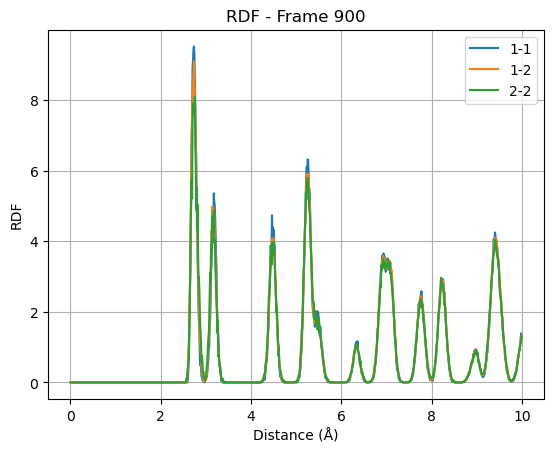

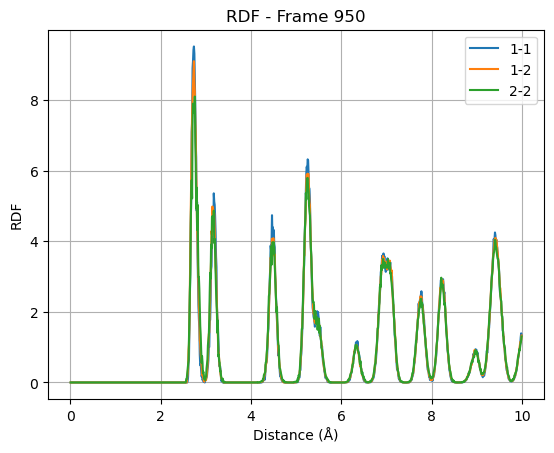

In [6]:
# Loop over frames
for frame in range(0,total_frames,ndump):
    
    data = pipeline.compute(frame)
    
    rdf_data = data.tables['coordination-rdf']
    rdf_data_xy = data.tables['coordination-rdf'].xy()
    
    rdf_names = rdf_data.y.component_names
    
    bin_centers = rdf_data_xy[:, 0]
    """
    if rdf_data.shape[1] > 2:
        rdf_total = rdf_data[:, -1]
    else:
        rdf_total = rdf_data[:, 1]
    """
    
    """
    plt.figure()
    plt.plot(bin_centers, rdf_total, label=f'Frame {frame}')
    plt.xlabel('Distance (Å)')
    plt.ylabel('RDF')
    plt.title(f'RDF - Frame {frame}')
    plt.legend()
    plt.grid()
    """
    
    plt.figure()
    for component, name in enumerate(rdf_names):
        plt.plot(bin_centers, rdf_data.y[:,component], label=name.translate(atom_types))
        plt.xlabel('Distance (Å)')
    plt.ylabel('RDF')
    plt.title(f'RDF - Frame {frame}')
    plt.legend()
    plt.grid()
    
plt.show()